In [3]:
from src.data_importation import (
    load_data,
    get_coords,
    add_coords_to_df,
    pivot_df,
    filter_columns_by_month,
)
from src.data_exportation import export_data
from script.data_visualization import create_map
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [ ]:
ADMIN_LEVEL = 3
input_df = load_data()
coords_dict = get_coords(input_df, ADMIN_LEVEL)
df = input_df.copy()

Getting coordinates: 100%|██████████| 326/326 [04:50<00:00,  1.12it/s]


In [4]:
df = add_coords_to_df(df, coords_dict, ADMIN_LEVEL)
df = df.dropna()
export_data(df, "data/flood_data.csv")

In [48]:
# df = pd.read_csv("data/flood_data.csv")
df["Start_Date"] = pd.to_datetime(df["Start_Date"])
df["End_Date"] = pd.to_datetime(df["End_Date"])

data_df = pivot_df(df, 3, interpolate=False)
print(data_df.shape)

(324, 123)


In [52]:
september_df = filter_columns_by_month(data_df, "2024-09")
# september_df = september_df.drop(columns=["Latitude", "Longitude"], axis=1)
# Some custom date's to make it corrospond to the data
september_df = september_df.drop(september_df.columns[2:9], axis=1)
# september_df = september_df.drop(september_df.columns[-:], axis=1)

september_df.to_csv("data/september_flood_data.csv", index=True)
september_df.head()

,Latitude,Longitude,2024-09-08 00:00:00,2024-09-09 00:00:00,2024-09-10 00:00:00,2024-09-11 00:00:00,2024-09-12 00:00:00,2024-09-13 00:00:00,2024-09-14 00:00:00,2024-09-15 00:00:00,...,2024-09-21 00:00:00,2024-09-22 00:00:00,2024-09-23 00:00:00,2024-09-24 00:00:00,2024-09-25 00:00:00,2024-09-26 00:00:00,2024-09-27 00:00:00,2024-09-28 00:00:00,2024-09-29 00:00:00,2024-09-30 00:00:00
Admin3,,,,,,,,,,,,,,,,,,,,,
Ahlone,16.79,96.13,0.32,0.32,NaN,0.32,NaN,NaN,NaN,0.32,...,0.32,0.32,0.32,NaN,NaN,NaN,0.32,0.75,NaN,0.75
Amarapura,21.90,96.05,414.83,414.83,NaN,575.80,NaN,NaN,NaN,575.80,...,618.31,618.31,618.31,NaN,NaN,NaN,618.31,634.54,NaN,634.54
Ann,19.92,94.03,1802.69,1957.12,NaN,1957.12,NaN,NaN,NaN,1957.12,...,2256.84,2256.84,2256.84,NaN,NaN,NaN,2256.84,2258.82,NaN,2349.57
Aunglan,19.20,95.50,627.66,627.66,NaN,627.66,NaN,NaN,NaN,627.66,...,730.66,730.66,730.66,NaN,NaN,NaN,730.66,837.89,NaN,837.89
Aungmyaythazan,21.99,96.10,3.25,3.25,NaN,3.25,NaN,NaN,NaN,3.25,...,3.31,3.31,3.31,NaN,NaN,NaN,3.31,3.31,NaN,3.31


In [ ]:
townships = "Taungoo"  # Toungoo
september_df.loc[townships]

Latitude                  18.81
Longitude                 96.24
2024-09-08 00:00:00     7007.65
2024-09-09 00:00:00     7007.65
2024-09-10 00:00:00         NaN
2024-09-11 00:00:00     7545.12
2024-09-12 00:00:00         NaN
2024-09-13 00:00:00         NaN
2024-09-14 00:00:00         NaN
2024-09-15 00:00:00     7545.12
2024-09-16 00:00:00    11119.71
2024-09-17 00:00:00         NaN
2024-09-18 00:00:00    11119.71
2024-09-19 00:00:00         NaN
2024-09-20 00:00:00    12098.06
2024-09-21 00:00:00    12098.06
2024-09-22 00:00:00    12098.06
2024-09-23 00:00:00    12098.06
2024-09-24 00:00:00         NaN
2024-09-25 00:00:00         NaN
2024-09-26 00:00:00         NaN
2024-09-27 00:00:00    12098.06
2024-09-28 00:00:00    14686.89
2024-09-29 00:00:00         NaN
2024-09-30 00:00:00    14686.89
Name: Taungoo, dtype: float64

Adding locations: 323it [00:00, 778.54it/s]


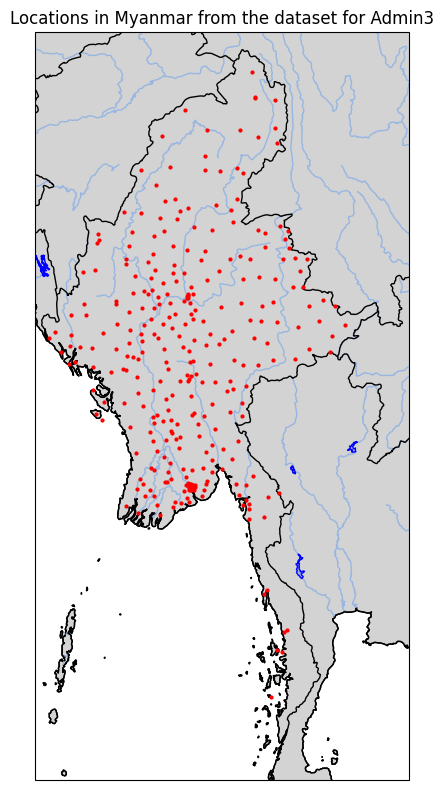

In [55]:
map_df = september_df.reset_index()
create_map(map_df, ADMIN_LEVEL)

In [5]:
toungoo_df = pd.read_csv("data/Toungoo_waterlevel.csv", sep=",")
toungoo_df.head()

,Date,Rivers,Stations,Danger level (CM),Water level at (12:30) hr (cm),Water level changes during last (24) hr (cm),Water level forecast at next (24) hrs (cm),Remarks,Day,Water Level Classification
0,2024-09-08,Sittoung,Toungoo,600,564,-11,554,NaN,8,0
1,2024-09-09,Sittoung,Toungoo,600,549,-15,534,NaN,9,0
2,2024-09-10,Sittoung,Toungoo,600,552,3,562,NaN,10,0
3,2024-09-11,Sittoung,Toungoo,600,593,41,638,It may exceeded its above danger level during ...,11,0
4,2024-09-12,Sittoung,Toungoo,600,656,63,716,It may rise about 2 feet during the next 1 day...,12,1


In [6]:
danger_level = toungoo_df["Danger level (CM)"][0]
toungoo_df["Date"] = pd.to_datetime(toungoo_df["Date"], format="%d/%m/%Y")
toungoo_df["Day"] = toungoo_df["Date"].dt.strftime("%d")

ValueError: time data "2024-09-08" doesn't match format "%d/%m/%Y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [7]:
x = 4  # Replace with your desired maximum classification value

min_level = toungoo_df["Water level at (12:30) hr (cm)"].min()
max_level = toungoo_df["Water level at (12:30) hr (cm)"].max()


def classify_water_level(level, min_level, max_level, x):
    if level < min_level:
        return 0
    else:
        return round((level - min_level) / (max_level - min_level) * x)


toungoo_df["Water Level Classification"] = toungoo_df[
    "Water level at (12:30) hr (cm)"
].apply(classify_water_level, args=(danger_level, max_level, x))

print(f"Min: {min_level}, Max: {max_level}")
print(toungoo_df[["Water level at (12:30) hr (cm)", "Water Level Classification"]])

Min: 527, Max: 805
    Water level at (12:30) hr (cm)  Water Level Classification
0                              564                           0
1                              549                           0
2                              552                           0
3                              593                           0
4                              656                           1
5                              735                           3
6                              805                           4
7                              774                           3
8                              744                           3
9                              726                           2
10                             716                           2
11                             710                           2
12                             700                           2
13                             698                           2
14                             692  

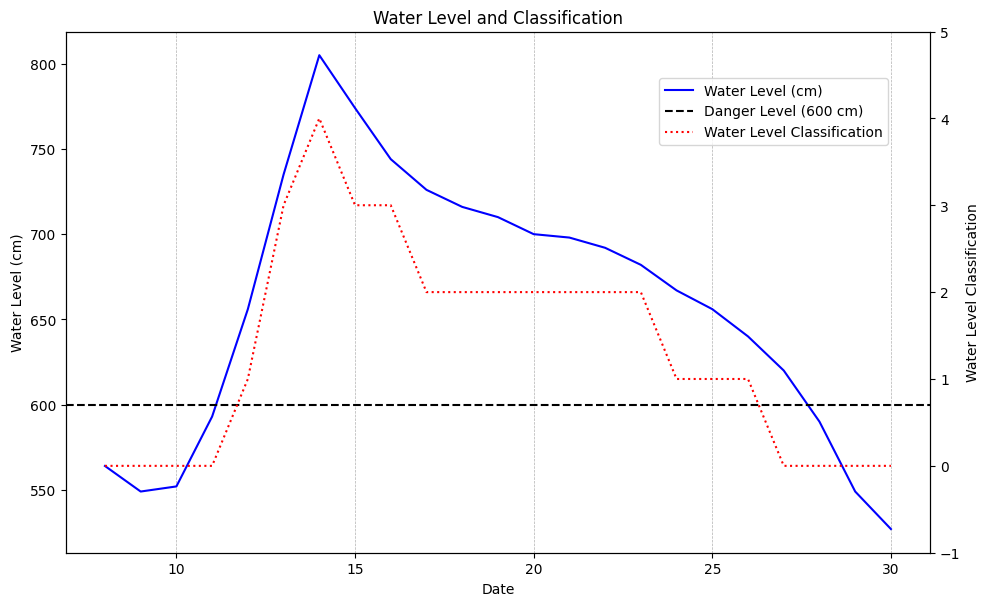

In [8]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Water Level
ax1.plot(
    toungoo_df["Day"],
    toungoo_df["Water level at (12:30) hr (cm)"],
    label="Water Level (cm)",
    color="b",
)
ax1.set_xlabel("Date")
ax1.set_ylabel("Water Level (cm)")
ax1.tick_params(axis="y")
ax1.grid(True, which="both", axis="x", linestyle="--", linewidth=0.5)


# Danger Level
plt.axhline(y=danger_level, color="black", linestyle="--", label=f"Danger Level ({danger_level} cm)")

# Classification
ax2 = ax1.twinx()
ax2.plot(
    toungoo_df["Day"],
    toungoo_df["Water Level Classification"],
    label="Water Level Classification",
    linestyle=":",
    color="r",
)
ax2.set_ylabel("Water Level Classification")
ax2.tick_params(axis="y")
ax2.set_ylim(-1, x + 1)
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))


fig.tight_layout()
plt.title("Water Level and Classification")
fig.legend(loc="upper right", bbox_to_anchor=(0.9, 0.9))
plt.show()

In [18]:
# toungoo_df.to_csv("data/Toungoo_waterlevel.csv", index=False)
toungoo_df["Water Level Classification"].to_csv("data/flood_level.csv", index=True)
